## Target Localization Using Two Antennas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from matplotlib import style
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## Localization Problem

Below we have some code to generate a demo figure for understanding purposes.

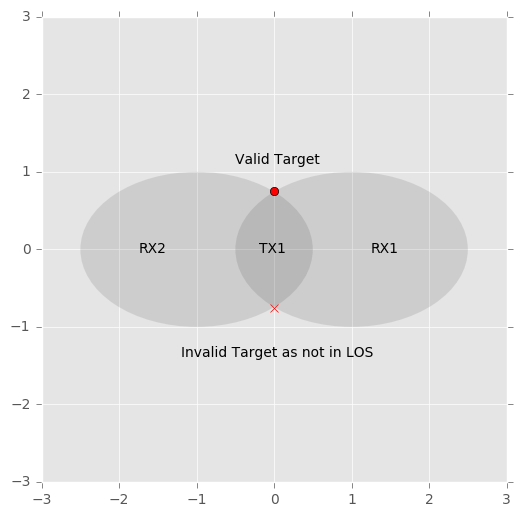

In [7]:
e1 = Ellipse(xy=[1,0], width=3, height=2, angle=0)
e2 = Ellipse(xy=[-1,0], width=3, height=2, angle=0)

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(e1)
e1.set_facecolor([0,0,0])
e1.set_alpha(0.1)

ax.add_artist(e2)
e2.set_facecolor([0,0,0])
e2.set_alpha(0.1)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.plot(0, 0.75, 'or')
ax.plot(0, -0.75, 'xr')

ax.text(-0.20, 0.1, 'TX1',
        horizontalalignment='left',
        verticalalignment='top')

ax.text(1.25, 0.1, 'RX1',
        horizontalalignment='left',
        verticalalignment='top')

ax.text(-1.75, 0.1, 'RX2',
        horizontalalignment='left',
        verticalalignment='top')

ax.text(-0.5, 1.25, 'Valid Target',
        horizontalalignment='left',
        verticalalignment='top')

ax.text(-1.2, -1.25, 'Invalid Target as not in LOS',
        horizontalalignment='left',
        verticalalignment='top')


Here, we have two ellipses and Transmitter (TX1) is at the foci of both ellipses. For ellipse 1, TX1 and RX1 are the two foci and for ellipse 2, TX2 and RX2 are the two foci. Here are some key points to keep in mind:

**c:** Since, antennas would always be in a fixed configuration, 'c' (distance from center to a focal point) would always be the same. For this notebook, we can set it to `1`.

**a:** The radius of major axis is known as `a`. From the properties of ellipse, we know that sum of the distances from any point on the boundary of ellipse to the two foci is always same and that is `2a`. `2a` also happens to be the round-trip distance from transmitter to antenna. This means, that given the TOF, we can find `a`. Good.

**b**: The last parameter in the equation of ellipse is `b`. It can be solved in terms of `c` & `a`. 

${b=}\sqrt{a^2-c^2}$ 

Since, we have fixed c to 1:

$\implies{b=}\sqrt{a^2}$ 

$\implies{b=a}$ 

Now, remember, that `a` is equal to the time of flight. This means that `b` for both ellipse would be a different value depending on the time of flight.

## Solving Ellipse Equations

Let's call time of flight from TX1 to RX1 **`t1`** time of flight from TX1 to RX2 **`t2`**. Then we can write equation of ellipses as:

$\frac{(x-c)^2}{a^2} + \frac{y^2}{b^2} = 1$

$\frac{(x+c)^2}{a^2} + \frac{y^2}{b^2} = 1$

Substitute values of `a` and `b`.

$\frac{(x-c)^2}{t1^2} + \frac{y^2}{t1^2} = 1$

$\frac{(x+c)^2}{t2^2} + \frac{y^2}{t2^2} = 1$

Simplifying them:

$ {(x-1)^2 + y^2 = t1^2}  $

$ {(x+1)^2 + y^2 = t2^2}  $

Let's find their solutions:

In [93]:
from sympy.solvers import solve
from sympy import symbols

In [110]:
x, y, t1, t2 = symbols('x y t1 t2')
solve([(x-1)**2 + y**2 - t1**2, (x+1)**2 + y**2 - t2**2], [x, y])

[(-(t1 - t2)*(t1 + t2)/4,
  -sqrt(-(t1 - t2 - 2)*(t1 - t2 + 2)*(t1 + t2 - 2)*(t1 + t2 + 2))/4),
 (-(t1 - t2)*(t1 + t2)/4,
  sqrt(-(t1 - t2 - 2)*(t1 - t2 + 2)*(t1 + t2 - 2)*(t1 + t2 + 2))/4)]

Now, assume `t1=1` and `t2=2`.

In [113]:
solve([(x-1)**2 + y**2 - 1**2, (x+1)**2 + y**2 - 2**2], [x, y])

[(3/4, -sqrt(15)/4), (3/4, sqrt(15)/4)]

Here, the second solution is valid as it has positive `y` and therefore, is in LOS.

In [6]:
np.sqrt(15)/4

0.96824583655185426